# Proyecto Final Analítica: Análisis de Datos para pacientes de Parkinson

### Estudiante: Juan Felipe Reyes G
### Código: A00309924

### Profesor: Javier Diaz - Cristian Urcuqui


## Descripcción del Problema:



## Diccionario de datos:


In [205]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics, tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [119]:
data_orig = pd.read_csv('dataset_variables_parkinson_marcha_K1_pdg.csv', header = 0, names=None, sep=';', decimal=',')
data_orig.Case1_Control0 = data_orig.Case1_Control0.replace(1, 'Positivo')
data_orig.Case1_Control0 = data_orig.Case1_Control0.replace(0, 'Negativo')

data_orig

,PKID,Case1_Control0,Edad,Genero,GaitAnalysisTestId,Id,JointType,Cycle Number,Cycle Time,Cycle Time Unit,...,Swing Time,Swing Time Unit,Distance,Distance Unit,Duration Time,Duration Time Unit,Speed,Speed Unit,Acceleration,Acceleration Unit
0,PK027,Positivo,79,M,4525c4ba-fd77-4c77-a9a8-bbe08404edd1,cf233379-0572-4f08-98e3-4cd34c71c7e1,AnkleRight,1,0.803979,Seconds (average),...,0.670972,Seconds,1.979175,Meters,2.058999,Seconds,0.961232,Meter/Seconds (m/s),0.466844,Meter/Seconds^2 (m/s^2)
1,PK027,Positivo,79,M,4525c4ba-fd77-4c77-a9a8-bbe08404edd1,db78663b-09b7-4202-9c53-a71f5d935e7a,AnkleLeft,1,0.701892,Seconds (average),...,0.624083,Seconds,1.890646,Meters,1.357033,Seconds,1.393220,Meter/Seconds (m/s),1.026666,Meter/Seconds^2 (m/s^2)
2,PK027,Positivo,79,M,b4f2ed2c-6ffe-488b-b5e1-b9758031d5a9,a17c22de-87f3-4ecc-8461-ed58ee1457fb,AnkleRight,1,0.826989,Seconds (average),...,0.704229,Seconds,1.948560,Meters,2.092554,Seconds,0.931188,Meter/Seconds (m/s),0.445001,Meter/Seconds^2 (m/s^2)
3,PK027,Positivo,79,M,b4f2ed2c-6ffe-488b-b5e1-b9758031d5a9,a19237ea-3b4f-41e4-89dc-473547b1c31f,AnkleLeft,1,0.842031,Seconds (average),...,0.858070,Seconds,1.923441,Meters,2.028073,Seconds,0.948408,Meter/Seconds (m/s),0.467640,Meter/Seconds^2 (m/s^2)
4,PK027,Positivo,79,M,e3db2b5d-1e8d-4b13-b09d-a67b0003bfd8,508fe73d-a0a9-4014-bc47-028d40086cba,AnkleRight,1,0.789131,Seconds (average),...,0.718242,Seconds,1.759962,Meters,1.996203,Seconds,0.881655,Meter/Seconds (m/s),0.441666,Meter/Seconds^2 (m/s^2)
5,PK027,Positivo,79,M,e3db2b5d-1e8d-4b13-b09d-a67b0003bfd8,d2cd4af5-182a-4c0a-a0fe-90f814af1491,AnkleLeft,1,0.795529,Seconds (average),...,0.811643,Seconds,1.974094,Meters,2.121983,Seconds,0.930306,Meter/Seconds (m/s),0.438414,Meter/Seconds^2 (m/s^2)
6,PK015,Positivo,68,M,074b8245-0d88-4050-b5e8-3ab1b8b9f1c4,e4d1a63a-845c-41a9-8497-61fd4c3ba2b4,AnkleRight,1,1.193026,Seconds (average),...,0.953771,Seconds,1.922531,Meters,2.354978,Seconds,0.816369,Meter/Seconds (m/s),0.346657,Meter/Seconds^2 (m/s^2)
7,PK015,Positivo,68,M,074b8245-0d88-4050-b5e8-3ab1b8b9f1c4,c8e5ff5e-a684-4f5e-9647-af8953685d96,AnkleLeft,1,0.488694,Seconds (average),...,0.871583,Seconds,1.951583,Meters,2.355888,Seconds,0.828385,Meter/Seconds (m/s),0.351623,Meter/Seconds^2 (m/s^2)
8,PK015,Positivo,68,M,2b113a30-34ef-4c94-b17b-0cd78e7d3195,cdc4d546-affd-4eb4-9b48-fe22d4deb862,AnkleRight,1,1.045567,Seconds (average),...,0.892023,Seconds,1.972823,Meters,2.090137,Seconds,0.943872,Meter/Seconds (m/s),0.451584,Meter/Seconds^2 (m/s^2)
9,PK015,Positivo,68,M,2b113a30-34ef-4c94-b17b-0cd78e7d3195,5177e25a-39df-4dfc-8f25-0ec5fbe791d4,AnkleLeft,1,0.834999,Seconds (average),...,0.716997,Seconds,1.858186,Meters,2.011989,Seconds,0.923557,Meter/Seconds (m/s),0.459027,Meter/Seconds^2 (m/s^2)


In [120]:
data_origr = data_orig[data_orig.JointType=='AnkleRight']
data_origl = data_orig[data_orig.JointType=='AnkleLeft']

data_origr = data_origr.drop(['JointType'], axis=1)

data_origl = data_origl.loc[:,data_origl.columns.isin(['Cycle Time', 'Stance Percent', 'Stance Time',
                                                       'Step Length', 'Step Number', 'Step Time', 'Step Cadence', 
                                                       'Stride Number', 'Stride Length','Swing Percent', 'Swing Time', 
                                                       'Distance', 'Duration Time', 'Speed','Acceleration'])]

data_origl.columns = [item + "l" for item in data_origl.columns]

data_origl.index = range(0,len(data_origl))
data_origr.index = range(0,len(data_origl))
data_orig = pd.concat([data_origr,data_origl], axis=1, sort=True)

print(data_orig.shape)
data_orig.head()

(198, 48)


,PKID,Case1_Control0,Edad,Genero,GaitAnalysisTestId,Id,Cycle Number,Cycle Time,Cycle Time Unit,Stance Percent,...,Step Timel,Step Cadencel,Stride Numberl,Stride Lengthl,Swing Percentl,Swing Timel,Distancel,Duration Timel,Speedl,Accelerationl
0,PK027,Positivo,79,M,4525c4ba-fd77-4c77-a9a8-bbe08404edd1,cf233379-0572-4f08-98e3-4cd34c71c7e1,1,0.803979,Seconds (average),0.644524,...,0.312041,88.428185,1,0.185463,0.459888,0.624083,1.890646,1.357033,1.393220,1.026666
1,PK027,Positivo,79,M,b4f2ed2c-6ffe-488b-b5e1-b9758031d5a9,a17c22de-87f3-4ecc-8461-ed58ee1457fb,1,0.826989,Seconds (average),0.633677,...,0.429035,59.169468,1,1.198056,0.423096,0.858070,1.923441,2.028073,0.948408,0.467640
2,PK027,Positivo,79,M,e3db2b5d-1e8d-4b13-b09d-a67b0003bfd8,508fe73d-a0a9-4014-bc47-028d40086cba,1,0.789131,Seconds (average),0.610778,...,0.405821,56.550877,1,1.059078,0.382493,0.811643,1.974094,2.121983,0.930306,0.438414
3,PK015,Positivo,68,M,074b8245-0d88-4050-b5e8-3ab1b8b9f1c4,e4d1a63a-845c-41a9-8497-61fd4c3ba2b4,1,1.193026,Seconds (average),0.536687,...,0.435792,50.936203,1,1.085094,0.369960,0.871583,1.951583,2.355888,0.828385,0.351623
4,PK015,Positivo,68,M,2b113a30-34ef-4c94-b17b-0cd78e7d3195,cdc4d546-affd-4eb4-9b48-fe22d4deb862,1,1.045567,Seconds (average),0.508093,...,0.358499,59.642470,1,1.189026,0.356362,0.716997,1.858186,2.011989,0.923557,0.459027


## EDA

In [121]:
data_orig.describe(include='all')

,PKID,Case1_Control0,Edad,Genero,GaitAnalysisTestId,Id,Cycle Number,Cycle Time,Cycle Time Unit,Stance Percent,...,Step Timel,Step Cadencel,Stride Numberl,Stride Lengthl,Swing Percentl,Swing Timel,Distancel,Duration Timel,Speedl,Accelerationl
count,198,198,198.000000,198,198,198,198.000000,198.000000,198,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
unique,67,2,NaN,2,198,198,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,PK008,Negativo,NaN,M,0775235e-d09c-4383-8711-46ee6930b59a,30411e35-30ef-4754-bded-3913ddc07653,NaN,NaN,Seconds (average),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,103,NaN,123,1,1,NaN,NaN,198,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,66.353535,NaN,NaN,NaN,1.141414,0.837627,NaN,0.558273,...,0.380088,67.328258,1.161616,1.037122,0.406434,0.954616,1.917815,2.399744,0.921560,0.490608
std,NaN,NaN,9.902379,NaN,NaN,NaN,0.523753,0.235860,NaN,0.064955,...,0.087821,17.091738,0.582434,0.495557,0.057140,0.446784,0.070699,1.166768,0.299530,0.305690
min,NaN,NaN,44.000000,NaN,NaN,NaN,1.000000,0.108028,NaN,0.326449,...,0.187766,30.287446,1.000000,0.049181,0.288840,0.530065,1.404693,1.154018,0.267421,0.037188
25%,NaN,NaN,59.000000,NaN,NaN,NaN,1.000000,0.703217,NaN,0.520942,...,0.313779,54.643540,1.000000,0.795052,0.364149,0.733994,1.893684,1.815035,0.771610,0.309683
50%,NaN,NaN,66.000000,NaN,NaN,NaN,1.000000,0.822769,NaN,0.571919,...,0.374026,63.933662,1.000000,1.127766,0.399318,0.842463,1.925311,2.144542,0.895144,0.415586
75%,NaN,NaN,75.000000,NaN,NaN,NaN,1.000000,0.933616,NaN,0.604162,...,0.428191,80.717999,1.000000,1.309458,0.439218,0.983137,1.961079,2.495853,1.060614,0.581548


In [122]:
EP_val = data_orig.Case1_Control0.value_counts()
print(EP_val)
pk_positivo = EP_val[1]/len(data_orig)
pk_negativo = EP_val[0]/len(data_orig)

print("\nPositivos: %0.2f y Negativos: %0.2f" %(pk_positivo, pk_negativo))

Negativo    103
Positivo     95
Name: Case1_Control0, dtype: int64

Positivos: 0.48 y Negativos: 0.52


Al calcular el baseline se puede afirmar con un **52%** que un paciente NO sera diagnosticado con parkinson.

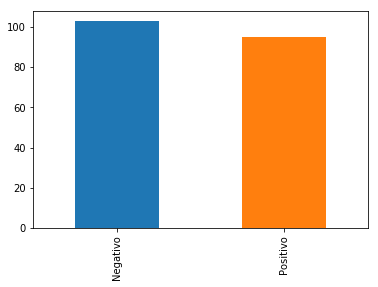

In [123]:
data_orig.Case1_Control0.value_counts().plot.bar()

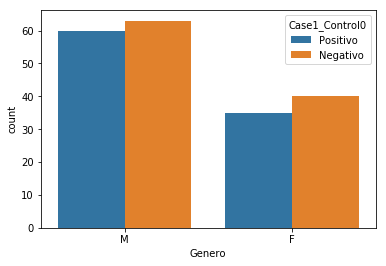

In [124]:
sns.countplot(data=data_orig, hue='Case1_Control0', x='Genero')

Se nota un problema de balanceo de datos para la variable genero, existiendo una mayoria para los hombre en el dataset.

In [125]:
pk_var_num = ['Edad','Cycle Time', 'Stance Percent', 'Stance Time', 'Step Length', 'Step Number',
       'Step Time', 'Step Cadence', 'Stride Number', 'Stride Length',
       'Swing Percent', 'Swing Time', 'Distance', 'Duration Time', 'Speed',
       'Acceleration']


print(pk_var_num)

['Edad', 'Cycle Time', 'Stance Percent', 'Stance Time', 'Step Length', 'Step Number', 'Step Time', 'Step Cadence', 'Stride Number', 'Stride Length', 'Swing Percent', 'Swing Time', 'Distance', 'Duration Time', 'Speed', 'Acceleration']


### Datos anómalos

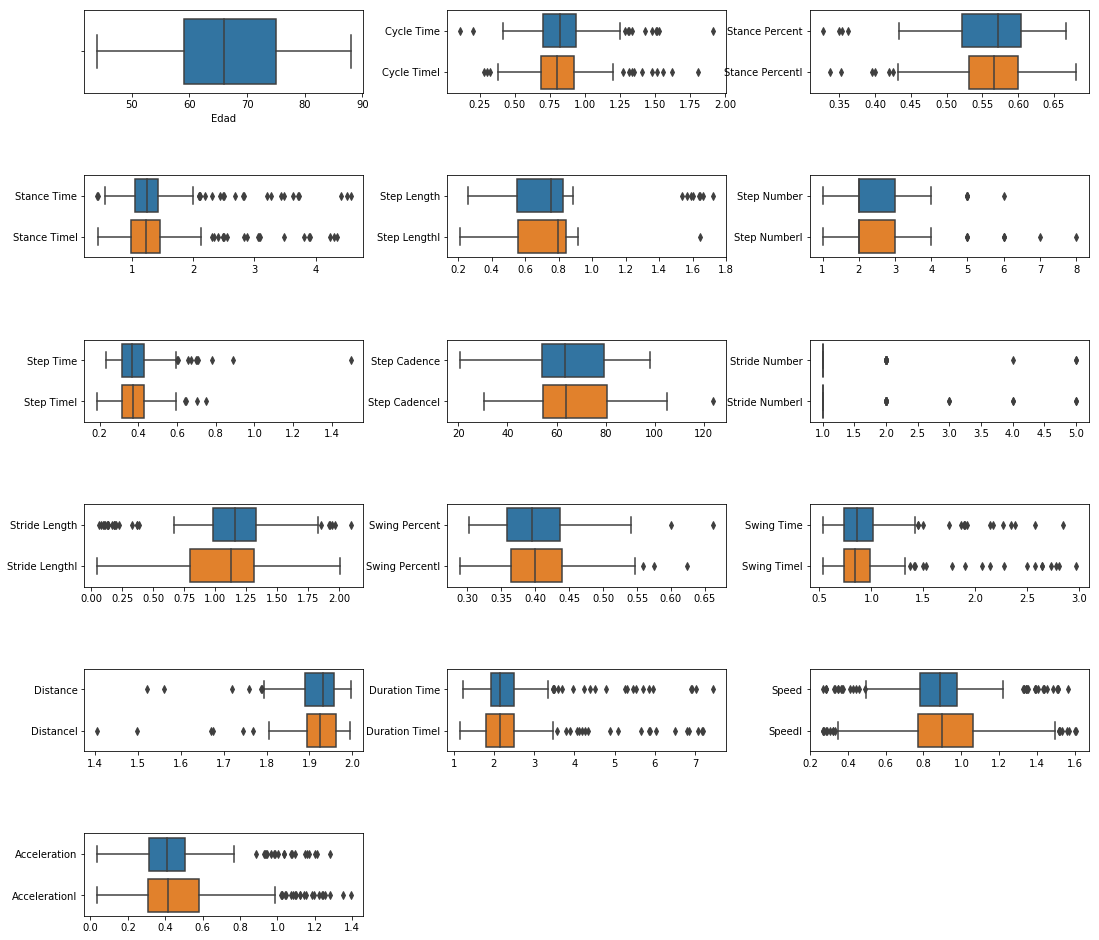

In [126]:
fig = plt.figure(figsize=(18,25))
leng_var_num = len(pk_var_num)
i=1;
for varNum in pk_var_num:
    ax = fig.add_subplot(leng_var_num+5,3,i)
    if varNum =='Edad':
        sns.boxplot(data=data_orig, x=varNum)  
    else:       
        sns.boxplot(data=data_orig.loc[:, [varNum, varNum+'l']] , orient='h') 
    plt.subplots_adjust(top=2)
    plt.subplots_adjust(hspace=1)
    plt.subplots_adjust(wspace=0.3)
    
    i+=1

Para algunas variables se eliminan los datos anómalos siguiendo las siguiente condiciones:
  - Cycle time: Los 6 valores más lejanos.
  - Step Time > 1.4
  - Step Cadence > 100
  - Swing Percent: Los 3 valores más lejanos.
  - Swing Time > 2.6
  - Distance < 1.6
  - Acceleration: Los 5 valores más lejanos.

In [168]:
temp = temp = data_orig[data_orig['Cycle Time'] > 1.6]
indexToErase = temp[0:6].index.get_values()
temp = temp = data_orig[data_orig['Cycle Timel'] > 1.6]
indexToErase = np.union1d(indexToErase, temp.index.get_values())

temp = data_orig[data_orig['Step Time'] > 0.8]
indexToErase = np.union1d(indexToErase, temp.index.get_values())

temp = data_orig.sort_values(['Step Cadence'], ascending=False)
indexToErase = np.union1d(indexToErase, temp[0:1].index.get_values())

temp = data_orig.sort_values(['Swing Percent'], ascending=False)
indexToErase = np.union1d(indexToErase, temp[0:2].index.get_values())
temp = data_orig.sort_values(['Swing Percentl'], ascending=False)
indexToErase = np.union1d(indexToErase, temp[0:1].index.get_values())

temp = data_orig[data_orig['Step Time'] > 2.7]
indexToErase = np.union1d(indexToErase, temp.index.get_values())
temp = data_orig[data_orig['Step Timel'] > 2.7]
indexToErase = np.union1d(indexToErase, temp.index.get_values())

temp = data_orig[data_orig['Distance'] < 1.6]
indexToErase = np.union1d(indexToErase, temp.index.get_values())
temp = data_orig[data_orig['Distancel'] < 1.6]
indexToErase = np.union1d(indexToErase, temp.index.get_values())

temp = data_orig.sort_values(['Acceleration'], ascending=False)
indexToErase = np.union1d(indexToErase, temp[0:2].index.get_values())
temp = data_orig.sort_values(['Accelerationl'], ascending=False)
indexToErase = np.union1d(indexToErase, temp[0:4].index.get_values())



print(data_orig.shape)
data_clean = data_orig.loc[~data_orig.index.isin(indexToErase)]
print(data_clean.shape)

(198, 48)
(182, 48)


In [169]:
# Limpieza dataset usando las variables computables
data_clean = data_clean.loc[:,data_clean.columns.isin(['Case1_Control0','Edad','Genero','Cycle Time', 'Stance Percent', 'Stance Time', 'Step Length', 'Step Number',
       'Step Time', 'Step Cadence', 'Stride Number', 'Stride Length',
       'Swing Percent', 'Swing Time', 'Distance', 'Duration Time', 'Speed',
       'Acceleration','Cycle Timel', 'Stance Percentl', 'Stance Timel', 'Step Lengthl',
       'Step Numberl', 'Step Timel', 'Step Cadencel', 'Stride Numberl',
       'Stride Lengthl', 'Swing Percentl', 'Swing Timel', 'Distancel',
       'Duration Timel', 'Speedl', 'Accelerationl'])]
print(data_clean.shape)

(182, 33)


## Análisis univariado

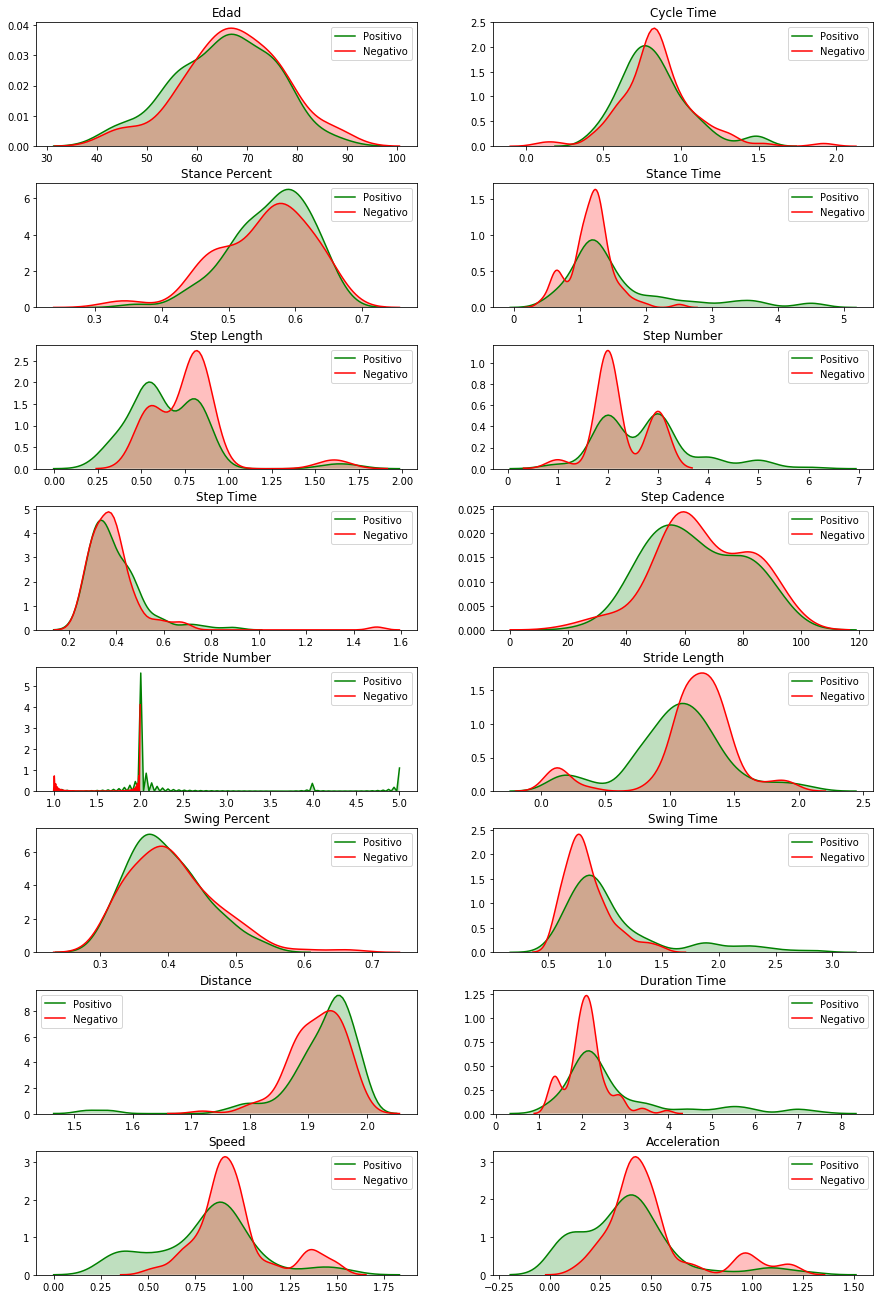

In [207]:
fig = plt.figure(figsize=(15,25))
i = 1
for var_num in pk_var_num:
    ax = fig.add_subplot((len(pk_var_num)/2)+2,2,i)
    sns.kdeplot(data=data_orig[data_orig.Case1_Control0 == 'Positivo'][var_num], shade=True, color='g', ax=ax)
    sns.kdeplot(data=data_orig[data_orig.Case1_Control0 == 'Negativo'][var_num], shade=True, color='r', ax=ax)
    plt.title(var_num)
    plt.subplots_adjust(top=1)
    plt.subplots_adjust(hspace=0.3)
    plt.legend(['Positivo','Negativo'])
    i+=1

## Reducción de Dimensionalidad

Debido a que son 16 variables variables 18 variables independientes, el proceso de visualización de los datos es difícil, por lo cual es necesario seleccionar los párametros que mejor representen el conjunto de datos. Se usan los siguiente método de selección:  

- Random Forest

#### Random Forest

In [170]:
data_rndForest = data_clean.loc[:, ~data_clean.columns.isin(['Case1_Control0'])]
rndFrs_x = pd.get_dummies(data_rndForest)
rndFrs_y = data_clean['Case1_Control0']
print(rndFrs_x.shape)
rndFrs_x.info(all)

(182, 33)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 197
Data columns (total 33 columns):
Edad               182 non-null int64
Cycle Time         182 non-null float64
Stance Percent     182 non-null float64
Stance Time        182 non-null float64
Step Length        182 non-null float64
Step Number        182 non-null int64
Step Time          182 non-null float64
Step Cadence       182 non-null float64
Stride Number      182 non-null int64
Stride Length      182 non-null float64
Swing Percent      182 non-null float64
Swing Time         182 non-null float64
Distance           182 non-null float64
Duration Time      182 non-null float64
Speed              182 non-null float64
Acceleration       182 non-null float64
Cycle Timel        182 non-null float64
Stance Percentl    182 non-null float64
Stance Timel       182 non-null float64
Step Lengthl       182 non-null float64
Step Numberl       182 non-null int64
Step Timel         182 non-null float64
Step Cadencel

In [171]:
np.random.seed(12345)
x_train, x_test, y_train, y_test = train_test_split(rndFrs_x, rndFrs_y, test_size = 0.3)

In [192]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(12345)
rforest = RandomForestClassifier(n_estimators=100,     #Número de modelos a crear 
                                criterion='entropy', # el criterio de particionamiento de un conjunto de datos
                                max_depth=10,      # prepoda: controla la profundidad del árbol (largo máximo de las ramas)
                                min_samples_split=10, # prepoda: el mínimo número de registros necesarios para crear una nueva rama
                                min_samples_leaf=1,  # prepoda: el mínimo número de registros en una hoja
                                max_features=('auto'), # Número o % de atributos de la muestra de aprendizaje
                                max_leaf_nodes=None, # prepoda: máximo número de nodos hojas
                                min_impurity_decrease=0.1, # prepoda: umbral mínimo de reducción de la impureza para aceptar la creación de una rama
                                bootstrap=True,      # Utilizar reemplazo en el muestreo de los registros de aprendizaje
                                oob_score=True,     # Evaluar cada modelo con los registros no utilizados en su aprendizaje 
                                n_jobs=2,            # Número de cores a utilizar
                                random_state=None,   # random seed para el generador aleatorio
                                verbose=0)  

rforest.fit(x_train, y_train)
y_pred = rforest.predict(x_test)
cm= metrics.confusion_matrix(y_test, y_pred)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))

Exactitud:  0.7090909090909091
Kappa    :  0.42105263157894735


In [193]:
rforest.oob_score_

0.6299212598425197

In [198]:
print(np.sort(rforest.feature_importances_))
rndFrs_x.columns[np.argsort(rforest.feature_importances_)]

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00343611 0.00710732
 0.00946184 0.01       0.01       0.01       0.01500752 0.02
 0.02       0.02       0.02490633 0.02538819 0.02599207 0.02878169
 0.03571783 0.03915883 0.05775019 0.06381707 0.07192505 0.08213559
 0.08417862 0.09       0.13523577]


Index(['Cycle Timel', 'Step Timel', 'Genero_F', 'Speed', 'Swing Percent',
       'Stride Number', 'Step Cadence', 'Genero_M', 'Step Time',
       'Stance Percent', 'Distance', 'Cycle Time', 'Edad', 'Distancel',
       'Duration Time', 'Stance Percentl', 'Stance Time', 'Stride Lengthl',
       'Step Number', 'Step Length', 'Swing Timel', 'Step Numberl',
       'Stride Length', 'Swing Percentl', 'Step Lengthl', 'Acceleration',
       'Swing Time', 'Step Cadencel', 'Duration Timel', 'Speedl',
       'Stride Numberl', 'Accelerationl', 'Stance Timel'],
      dtype='object')

## Análisis Bi-variado

Para facilitar la visualización del dataset, se escojen las 5 variables que han generado mayor importancia en el modelo de Random Forest

['Acceleration' 'Accelerationl' 'Case1_Control0' 'Duration Time'
 'Duration Timel' 'Speed' 'Speedl' 'Stance Time' 'Stance Timel'
 'Stride Number' 'Stride Numberl']


C:\Users\Juan Reyes\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Juan Reyes\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 2160x2880 with 0 Axes>

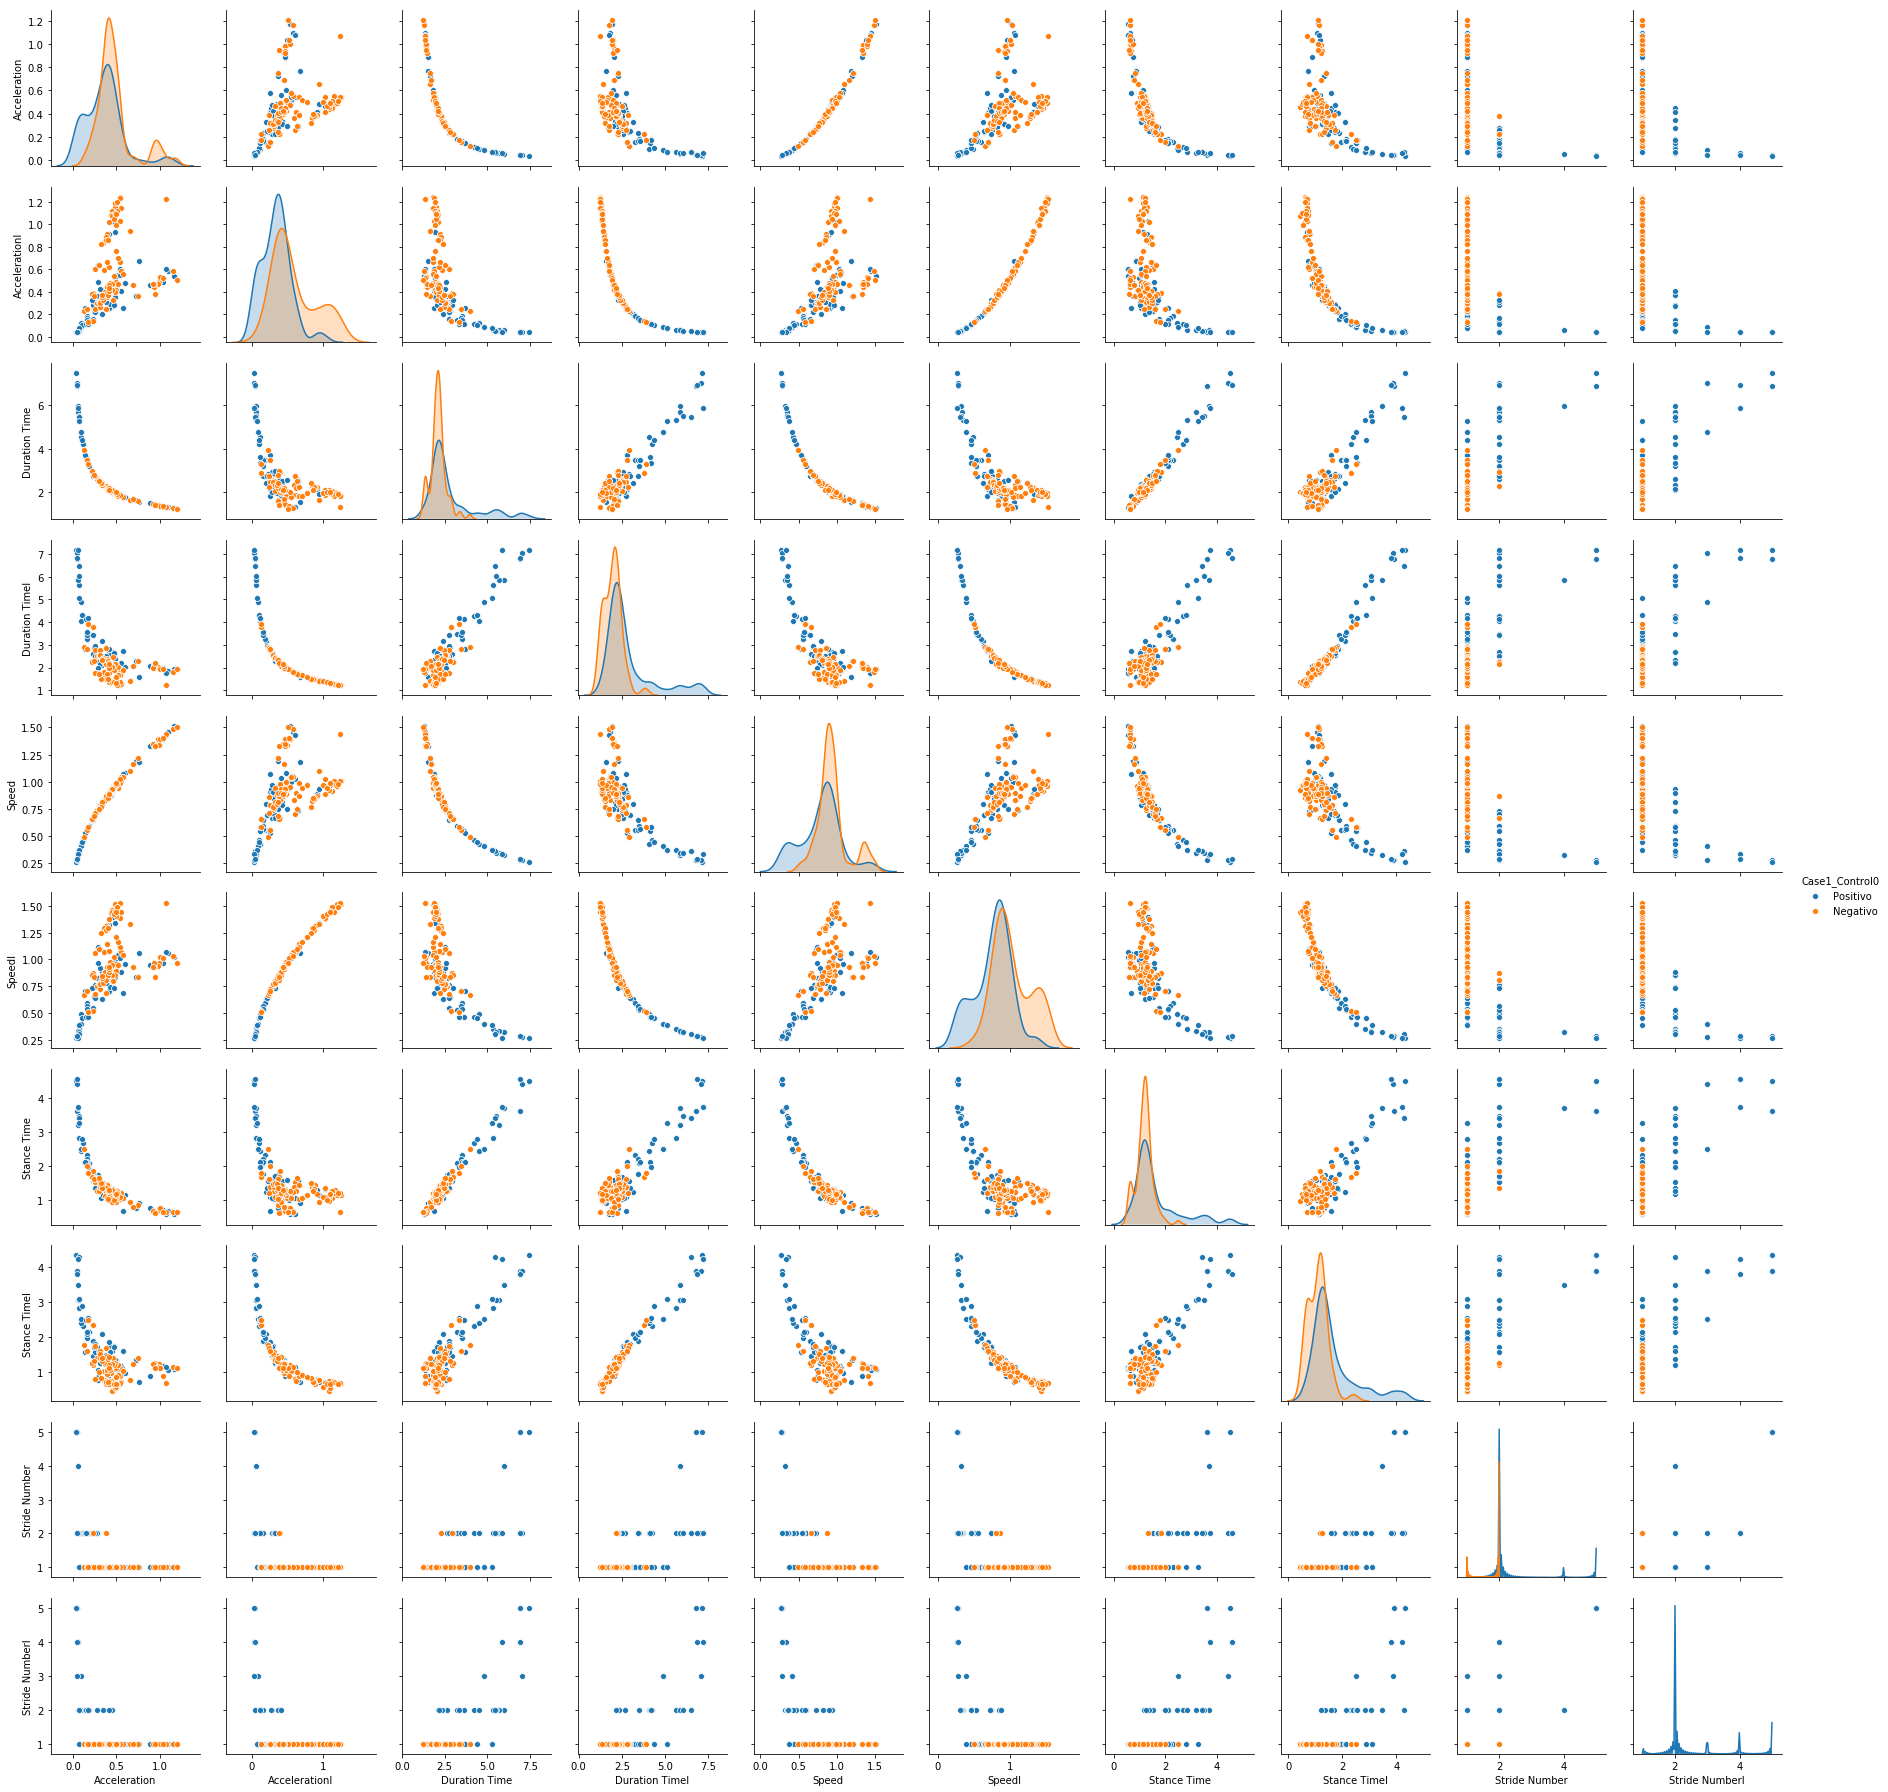

In [213]:
slected_features = ['Duration Timel', 'Speedl',
       'Stride Numberl', 'Accelerationl', 'Stance Timel','Duration Time', 'Speed',
       'Stride Number', 'Acceleration', 'Stance Time','Case1_Control0']

slected_features = np.sort(slected_features)
print(slected_features)
fig = plt.figure(figsize=(30,40))
sns.pairplot(data=data_clean.loc[:, slected_features], hue='Case1_Control0')

#### PCA (TODO)

De acuerdo al modelo de RandomForest el genero no es muy significante para el diagnóstico, por dicha razón se discrimina esta carácteristica y se aplica PCA:

In [206]:
x = rndFrs_x.loc[:,'Accelerationl']
std_x = preprocessing.scale(x)



## Preparación DATASET (TODO)

In [136]:
# Separación del dataset para estudiar cada tobilo (Variable categorica)


print("Número de AnkleRight: %d " % (len(df_aklr)))
print("Número de AnkleLeft: %d " % (len(df_akll)))

NameError: name 'df_aklr' is not defined

In [ ]:
df_knnl = df_akll
df_knnl = df_knnl.astype('float64', errors='ignore')
print(df_knnl.info())



df_knnl_numeric = df_knn._get_numeric_data()
df_knnl_numeric.head()

In [ ]:
df_knnl_numeric.columns